# Statistical Analysis (Random Networks)
### Aim:
Generate random networks and perform single gene correlation analysis on the random networks
Perform statistical analysis  to understand data distribution and likelihood that observed networks could have the same level of connectivity by chance
<br>
### Output:
Dictionary of dictionaries of results from random single gene analysis.
Statistical analysis of observed network connectivity and random network connectivity
<br>
#### Description:
- Perform single gene analysis for each of the randomly selected genes and compute correlations + generate networks
- Conduct statistical test for observed networks vs. random networks
- Save final dictionary of results as a pickle file in directory 'pickle_files'

In [1]:
# Import packages and DepMap tools
import os
import networkx as nx
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from DepMapTools.DataImport import SaveLoad, DataDownload
from DepMapTools.Networks import RandomNetworks

In [2]:
# Instantiate SaveLoad and DataDownload classes
sl = SaveLoad()
dd = DataDownload()

In [3]:
# Define CSV file path and load clean Achilles CRISPR data
PRD = ".."
csv_path = os.path.join(PRD,
                        'AnalysisData')
df = dd.load_data('CRISPR_gene_effect_clean.csv', 0, csv_path)

In [4]:
# Define CSV file path and load single gene analysis (495) pickle file
PRD = "."
filename = 'chronos_singlegene_495.pickle'
picklepath = os.path.join(PRD,
                        'pickle_files/'+filename)
gene_dict = sl.load_dict_pickle(picklepath)

<br>

### Generate Body of Random Networks

In [5]:
# Instantiate RandomNetworks class with the Achilles CRISPR data (df) and the Single Gene Analysis Pickle file (gene_dict)
rn = RandomNetworks(df, gene_dict)

In [6]:
# Perform random network analysis to generate
rand_results = rn.random_network_analysis()

In [7]:
# Save Random Network results
sl.save_dict_pickle(rand_results, 'chronos_singlegene_random')

<br>

### Statistical Analysis

In [8]:
# Calculate densities for the observed graphs
ob_dens = []
for key in gene_dict:
    g = gene_dict[key]['Network']
    den = nx.density(g)
    ob_dens.append(den)

In [9]:
# Calculate densities for the random graphs
ra_dens = []
for key in rand_results:
    g = rand_results[key]['Network']
    den = nx.density(g)
    ra_dens.append(den)

In [10]:
# Identify skew understand distribution
ob_skew = stats.skew(ob_dens)
ran_skew = stats.skew(ra_dens)
print(f'Data Skew for Observed Networks: {ob_skew}\nData Skew for Random Networks: {ran_skew}')

Data Skew for Observed Networks: 1.584624577516029
Data Skew for Random Networks: 0.6477178877805525


In [11]:
# Perform Kolmogorov-Smirnov test against normal distribution
o, po = stats.kstest(ob_dens, 'norm')
r, pr = stats.kstest(ra_dens, 'norm')

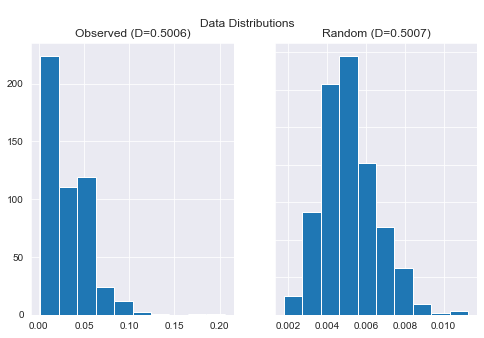

In [12]:
# Plot data distributions as histograms
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(1, 2)
fig.suptitle('\nData Distributions\n')
fig.set_size_inches(8, 5)
axs[0].hist(ob_dens)
axs[0].set_title(f'Observed (D={o:.4f})')
axs[1].hist(ra_dens)
axs[1].set_title(f'Random (D={r:.4f})')
# Hide X labels
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [13]:
# Data is non-normally distributed so perform two tailed Mann Whitney U test
res, p = stats.mannwhitneyu(ob_dens,
                            ra_dens)
if p < 0.01:
    print (f'P-value is significant (p={p})')
else:
    print (f'P-value not significant (p={p:.4f})')

P-value is significant (p=9.493832839143428e-93)


In [14]:
ob_df = pd.DataFrame(ob_dens, columns=['Density']).assign(Network='Observed')
ra_df = pd.DataFrame(ra_dens, columns=['Density']).assign(Network='Random')
final_df = pd.concat([ob_df, ra_df])
plot_df = pd.melt(final_df, id_vars=['Network'], var_name=['Density'])

In [15]:
plot_df

,Network,Density,value
0,Observed,Density,0.016804
1,Observed,Density,0.062713
2,Observed,Density,0.023338
3,Observed,Density,0.027623
4,Observed,Density,0.009091
...,...,...,...
978,Random,Density,0.004569
979,Random,Density,0.005041
980,Random,Density,0.003636
981,Random,Density,0.006733


Saving figure ob_net_den


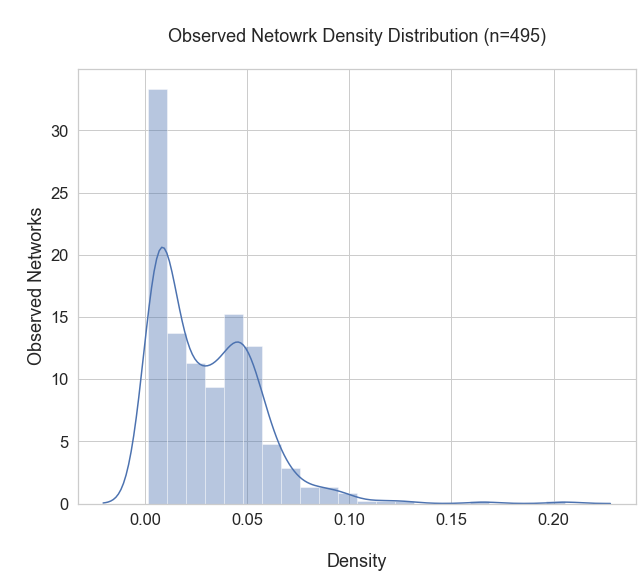

In [27]:
# Plot results
sns.set(rc={'figure.figsize':(10,8)}, style='whitegrid', font_scale=1.5)

x = pd.Series(ob_dens, name="Density")
ax = sns.distplot(x)
ax.set_title('\nObserved Netowrk Density Distribution (n=495)\n')
ax.set(xlabel='\nDensity', ylabel='\nObserved Networks')

sl.save_fig('ob_net_den', tight_layout=False)
plt.show()

Saving figure ran_net_den


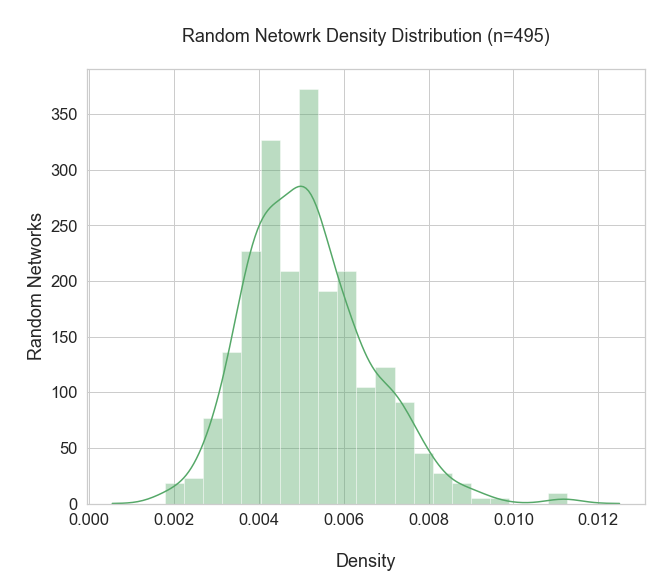

In [29]:
# Plot results
sns.set(rc={'figure.figsize':(10,8)}, style='whitegrid', font_scale=1.5)

x = pd.Series(ra_dens, name="Density")
ax = sns.distplot(x, color='g')
ax.set_title('\nRandom Netowrk Density Distribution (n=495)\n')
ax.set(xlabel='\nDensity', ylabel='\nRandom Networks')

sl.save_fig('ran_net_den', tight_layout=False)
plt.show()

In [30]:
ob_dens = {}
for key in gene_dict:
    g = gene_dict[key]['Network']
    den = nx.density(g)
    ob_dens[key] = den

In [40]:
# Calculate densities for the random graphs
ra_dens = {}
for key in rand_results:
    g = rand_results[key]['Network']
    den = nx.density(g)
    ra_dens[key] = den

In [41]:
df2 = pd.DataFrame.from_dict(ra_dens, orient='index', columns=['density'])

In [42]:
df2.describe()

,density
count,488.000000
mean,0.005152
std,0.001427
min,0.001782
25%,0.004146
50%,0.005048
75%,0.005960
max,0.011260
